In [1]:
!git clone https://github.com/neuralcomputer/ML_School.git

Cloning into 'ML_School'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 56 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), done.


# Тема № 22 . Ансамбли. Стекинг
Еще один вариант ансамблей - стекинг - когда объединяются результаты разнородных моделей с помощью еще одной модели.
В `sklearn` реализованы 
* [`StackingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier)  - классификатор
* [`StackingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor) - регрессор

Аргументы для создания ансамблей: 
* `estimators` - кортеж из названий и объектов моделей ансамбля
* `final_estimator` - модель для объединения результатов, по умолчанию `LogisticRegression` для классификатора и `RidgeCV` для регрессора.
* `cv` - число разбиений для кроссвалидации (или объекты) 
stack_method - по какому именно результату объядинять модели: ‘auto’, ‘predict_proba’, ‘decision_function’, ‘predict’,
* `verbose` - число, определяющее как подробно выводить информацию об обучении, по умолчанию 0 - не выводить
* `passthrough` - использовать ли для обучения финальной модели сами данные или только результаты моделей ансамбля.

Создаваемые модели имеют атрибуты 

* `estimators_` - список обученных моделей в ансамбле
* `final_estimator_` - обученная финальная модель
* `named_estimators_` - контейнер для доступа к параметрам моделей по их названию
* `classes_` - для классификатора метки классов

Реализованные методы аналогичны: `fit()`, `pedict()`, ... 

Реализованы также  [`VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) и [`VotingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor), отличающиеся тем, что в качестве финальной модели используется процедура голосования.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



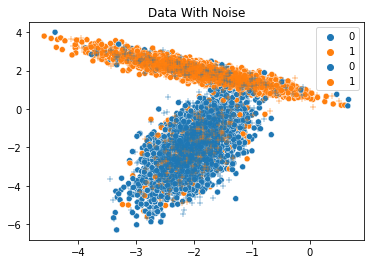

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local

Score= 0.889090909090909


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



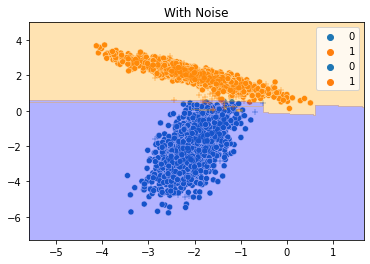

In [2]:
# функция  для рисования разделяющей поверхности на плоскости
from ML_School.utils import Div_plate
# Div_plate(clf,flip_level) принимает объект-классификатор и уровень шума (ошибок)
# создает двумерные данные, обучает классификатор, рисует разделяющую поверхность 

from sklearn.ensemble import   StackingClassifier #
from sklearn.svm import SVC # 
from sklearn.linear_model import LogisticRegression # 
from sklearn.tree import DecisionTreeClassifier
estimators = [('SVC', SVC(max_iter=10)),
              ('LogReg', LogisticRegression()),
              ('Tree',DecisionTreeClassifier())]
clf=StackingClassifier(estimators=estimators)
flip_level=0.2
Div_plate(clf,flip_level)

In [3]:
clf.final_estimator_.coef_

array([[1.79704272, 5.10424416, 0.71350066]])

Посмотрите на коэффициенты логистической регрессии финальной модели и скажите, результаты какого классификатора из ансамбля более важны?

Пробуйте самостоятельно другие данные, другие модели, другие параметры моделей.